# Final Project
## Machine Learning: Prediction on bike sharing demand

- Check where the file locate

In [1]:
pwd

'/Users/hchae/Desktop'

In [1]:
# Import

import folium
from folium.plugins import MarkerCluster

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

### Importing the Dataset

In [2]:
#dataset = pd.read_csv("123JourneyDataExtract15Aug2018-21Aug2018.csv")

dataset = pd.read_csv(
  "123JourneyDataExtract15Aug2018-21Aug2018.csv", 
  parse_dates = ['Start Date'], 
  index_col = "Start Date"
)

In [3]:
dataset.dtypes

Rental Id             int64
Duration              int64
Bike Id               int64
End Date             object
EndStation Id         int64
EndStation Name      object
StartStation Id       int64
StartStation Name    object
dtype: object

### Create extra column
#### Create hour, date, day_of_week and month dataframe column from start date column

In [112]:
dataset['date'] = dataset.index.day
dataset['month'] = dataset.index.month
dataset['year'] = dataset.index.year
dataset['hour'] = dataset.index.hour
dataset['minute'] = dataset.index.minute

date = dataset['date'].values
month = dataset['month'].values
year = dataset['year'].values
hour = dataset['hour'].values
minute = dataset['minute'].values

AttributeError: 'RangeIndex' object has no attribute 'day'

In [5]:
dataset['date'].head()

Start Date
2018-08-20 12:14:00    20
2018-08-16 08:22:00    16
2018-08-20 14:24:00    20
2018-08-17 00:01:00    17
2018-08-21 10:22:00    21
Name: date, dtype: int64

In [6]:
location = pd.read_csv("Cycle hire docking stations.csv")

### Add Longitude and Latitude for the station location

In [107]:
# for start station id

cnt = 0
loc_cnt = 0

for cnt in range(1000):
    data = dataset['StartStation Id'][cnt]
    for loc_cnt in range(802):
        loc = location['Station.Id'][loc_cnt]
        if (data - loc) == 0:
            dataset['start_log'][cnt] = location['longitude'][loc_cnt]
            dataset['start_lat'][cnt] = location['latitude'][loc_cnt]   
            #print (dataset['start_log'][cnt])
    loc_cnt = -1
    
cnt += 1
loc_cnt += 1

<ipython-input-107-bdb453401523>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['start_log'][cnt] = location['longitude'][loc_cnt]
<ipython-input-107-bdb453401523>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['start_lat'][cnt] = location['latitude'][loc_cnt]


In [110]:
# for end station id

cnt = 0
loc_cnt = 0

for cnt in range(1000):
    data = dataset['EndStation Id'][cnt]
    for loc_cnt in range(802):
        loc = location['Station.Id'][loc_cnt]
        if (data - loc) == 0:
            dataset['end_log'][cnt] = location['longitude'][loc_cnt]
            dataset['end_lat'][cnt] = location['latitude'][loc_cnt]   
    loc_cnt = -1
    
cnt += 1
loc_cnt += 1

<ipython-input-110-7a9b4acc6dfc>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['end_log'][cnt] = location['longitude'][loc_cnt]
<ipython-input-110-7a9b4acc6dfc>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset['end_lat'][cnt] = location['latitude'][loc_cnt]


### After the columns been added

In [111]:
dataset

,Rental Id,Duration,Bike Id,End Date,EndStation Id,EndStation Name,Start Date,StartStation Id,StartStation Name,start_log,start_lat,end_log,end_lat
0,79466053,1260,3133,20/08/2018 12:35,103,"Vicarage Gate, Kensington",20/08/2018 12:14,754,"Grenfell Road, Avondale",-0.214763,51.5129,-0.192539,51.5047
1,79325170,1200,13603,16/08/2018 08:42,83,"Panton Street, West End",16/08/2018 08:22,669,"Teversham Lane, Stockwell",-0.123258,51.4761,-0.131511,51.5096
2,79469808,1080,13368,20/08/2018 14:42,115,"Braham Street, Aldgate",20/08/2018 14:24,101,"Queen Street 1, Bank",-0.092940,51.5116,-0.073538,51.5142
3,79348433,600,13965,17/08/2018 00:11,616,"Aintree Street, Fulham",17/08/2018 00:01,37,"Penywern Road, Earl's Court",-0.192369,51.4916,-0.209973,51.4810
4,79503786,4680,12965,21/08/2018 11:40,446,"York Hall, Bethnal Green",21/08/2018 10:22,101,"Queen Street 1, Bank",-0.092940,51.5116,-0.055894,51.5289
...,...,...,...,...,...,...,...,...,...,...,...,...,...
245618,79393704,720,10792,18/08/2018 12:02,236,"Fashion Street, Whitechapel",18/08/2018 11:50,531,"Twig Folly Bridge, Mile End",-0.055167,51.5084,-0.022793,51.4973
245619,79458279,2280,3500,20/08/2018 09:06,254,"Chadwell Street, Angel",20/08/2018 08:28,499,"Furze Green, Bow",-0.055167,51.5084,-0.022793,51.4973
245620,79390430,3300,10125,18/08/2018 11:04,404,"Palace Gate, Kensington Gardens",18/08/2018 10:09,350,"Queen's Gate, Kensington Gardens",-0.055167,51.5084,-0.022793,51.4973
245621,79392872,3060,3978,18/08/2018 12:19,404,"Palace Gate, Kensington Gardens",18/08/2018 11:28,350,"Queen's Gate, Kensington Gardens",-0.055167,51.5084,-0.022793,51.4973


In [42]:
# Compute IsWeekday

weekday = np.zeros(len(date))
weekday[:] = np.nan
cnt = 0

for _year, _month, _date, _hour, _minute in zip(year, month, date, hour, minute):
  _dt = dt.datetime(_year, _month, _date, _hour, _minute)
  _weekday = _dt.weekday()
  weekday[cnt] = _weekday
  cnt += 1

IsWeekday = weekday < 5
dataset['IsWeekday'] = IsWeekday

# Compute TimeSlice

dataset['TimeSlice'] = (hour*3 + np.floor(minute/20)).astype(int)

#### Then we extract weekday data by date.
#### weekday() and evenly divide a 24-hour day into 72 time slices, such that each time slice represents a 20-minute interval.

In [65]:
dataset['TimeSlice'].head()

Start Date
2018-08-20 12:14:00    36
2018-08-16 08:22:00    25
2018-08-20 14:24:00    43
2018-08-17 00:01:00     0
2018-08-21 10:22:00    31
Name: TimeSlice, dtype: int64

In [68]:
start_id = dataset['StartStation Id'].values
end_id = dataset['EndStation Id'].values
start_station = dataset['StartStation Name'].values
end_station = dataset['EndStation Name'].values

In [70]:
# Extract only valid journeys

valid = np.zeros(len(date))
valid[:] = False
cnt = 0

for _start, _end in zip(start_id, end_id):
  if np.logical_and((_start in start_id), (_end in end_id)):
    valid[cnt] = True
  cnt += 1

dataset['Valid'] = valid

In [47]:
# Only keep valid and weekday journeys

df = dataset[dataset["IsWeekday"] == True].drop(columns="IsWeekday")
df = dataset[dataset["Valid"] == True].drop(columns="Valid")

print('Ratio of valid journeys= {:.2f}%'.format(df.shape[0] / dataset.shape[0] * 100))

Ratio of valid journeys= 100.00%


## Plot a graph

- Daily Graph

In [94]:
#df_by_month = dataset.resample('D').sum()
#df_by_month.head()

## Try to find a way you can add 'cnt' to this dataset
- Capacity
- Originial no of bike at noon


[Text(0.5, 0, 'Timestamp'), Text(0, 0.5, 'Duration')]

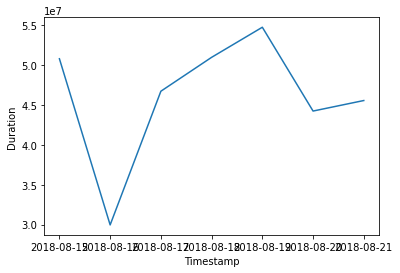

In [74]:
import seaborn as sns

ax = sns.lineplot(x = df_by_month.index, y = ('Duration'), data = df_by_month);
ax.set(xlabel = 'Timestamp', ylabel = 'Duration')

#### Average departure rates on weekdays

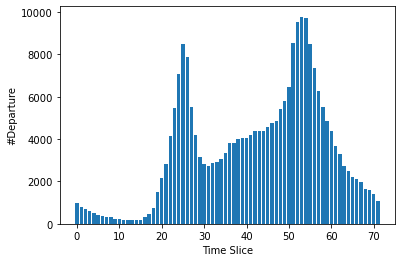

Peak Timeslice= 53


In [82]:
# Plot example

grp_by_timeslice = df.groupby('TimeSlice').count().values[:,0]

plt.bar(range(0,72), grp_by_timeslice)
plt.xlabel('Time Slice')
plt.ylabel('#Departure')
plt.show()

print('Peak Timeslice= {}'.format(grp_by_timeslice.argmax()))

## Visualisation of the map
### Need to fix the error [lat,lon]

In [143]:
lon = dataset['start_log']
lat = dataset['start_lat']
name = dataset['StartStation Name']

In [ ]:
## For later use
#Function to change colors

def color_change(c):
    if(c < 15):
        return('red')
    elif(15 <= c < 30):
        return('orange')
    else:
        return('green')

In [142]:
# Create base map

London = [51.506949, -0.122876]
map = folium.Map(location = London,
                 zoom_start = 12, 
                 tiles = "CartoDB positron")
#marker_cluster = MarkerCluster(locations = [lat,lon]).add_to(map)

# Plot markers

for _lat, _lon, _name in zip(lat, lon, name):
    folium.CircleMarker(location = [_lat, _lon], 
                        radius = 9, 
                        popup = _name, 
                        color = "gray", 
                        fill_opacity = 0.9).add_to(marker_cluster)
    
map

In [49]:
# Build DensityMap function

def DensityMap(stations, cnt_departure, cnt_arrival):

  London = [51.506949, -0.122876]
  
  map = folium.Map(location = London, 
                   zoom_start = 12, 
                   tiles = "CartoDB dark_matter")
  
  dataset['Total Departure'] = cnt_departure
  dataset['Total Arrival'] = cnt_arrival

  for index, row in stations.iterrows():
    net_departure = row['Total Departure'] - row['Total Arrival']
    
    _radius = np.abs(net_departure) 
    if np.isnan(_radius):
      _radius = 0
    
    if net_departure > 0:
      _color= '#E80018' # target red
    else:
      _color= '#81D8D0' # tiffany blue
  
    lat, lon = row['lat'], row['lon']
    _popup = '('+str(row['capacity'])+'/'+str(int(_radius))+') '+row['station_name']
  
    folium.CircleMarker(location = [lat,lon], 
                        radius = _radius, 
                        popup = _popup, 
                        color = _color, 
                        fill_opacity = 0.5).add_to(map)
  
  return map

In [51]:
# Select peak hours

TimeSlice = [25,53] # morning and evening
keyword = ['map_morning', 'map_evening']

# Journeys depart between 0820 and 0859, and between 1740 and 1819
for ts, kw in zip(TimeSlice, keyword):
  df_1 = df[df["TimeSlice"] == ts]
  df_2 = df[df["TimeSlice"] == (ts+1)]
  df_target = df_1.append(df_2)

  cnt_departure = df_target.groupby("StartStation Id").count().iloc[:,0]
  cnt_arrival = df_target.groupby("EndStation Id").count().iloc[:,0]

  vars()[kw] = DensityMap(stations, cnt_departure, cnt_arrival)

NameError: name 'stations' is not defined